In [ ]:

import nltk
import seaborn as sns
import importlib
import functions

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from functions import *
importlib.reload(functions)



Load all data and set the color scheme for each party

In [ ]:
# Load the DataFrame from a pickle file
df_manifesto = pd.read_pickle('data/df_manifesto_predictions.pkl') 
cmp_categories = pd.read_csv("data/cmp_categories.csv")



In [ ]:
party_colors = {
    "CDU": (0, 0, 0),         # Black
    "SPD": (255, 0, 0),       # Red
    "FDP": (235, 235, 20),     # Yellow
    "AfD": (135, 206, 250),   # Sky Blue
    "Left": (128, 0, 128),    # Purple
    "Greens DE": (0, 128, 0),     # Green
    "ÖVP": (0, 0, 0),         # Black
    "SPÖ": (255, 0, 0),       # Red
    "Neos": (235, 235, 20),     # Yellow
    "FPÖ": (135, 206, 250),   # Sky Blue
    #"LEFT": (128, 0, 128),    # Purple
    "Greens AU": (0, 128, 0)     # Green
}

Calculate the relative amount of statements per manifesto.
Manifestos have different lengths, so an absolute value can be misleading.

In [ ]:
# Group by 'manifesto_id' and calculate the score
manifesto_scores = df_manifesto.groupby('manifesto_id').apply(
    lambda x: pd.Series({
        'Expenditure score': x['predicted_label'].mean()*100,
        'party': x['party'].iloc[0],
        'country': x['country'].iloc[0],
        'year': x['year'].iloc[0]
    })
)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_20928\1799125265.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manifesto_scores = df_manifesto.groupby('manifesto_id').apply(


This plot counts how many statements pro- or anti austerity are in each manifesto. 

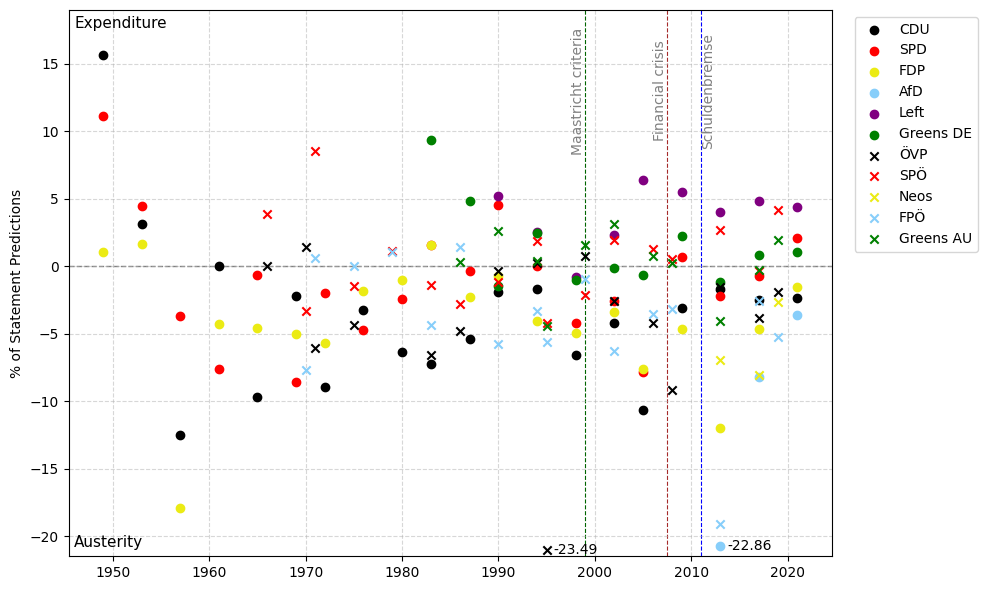

In [ ]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
for party, color in party_colors.items():
    party_data = manifesto_scores[manifesto_scores['party'] == party]
    country = party_data['country'].iloc[0]
    if country == 'DE':
        marker = 'o' 
    else:
        marker = 'x'
    plt.scatter(
        party_data['year'], 
        party_data['Expenditure score'], 
        label=party, 
        color=[c / 255 for c in color],
        marker= marker,
        zorder=2
    )


plt.ylim(-21.5,19)
plt.scatter(2013, -20.75, color=[c / 255 for c in party_colors['AfD']], marker='o', zorder=3)
plt.scatter(1995, -21, color="black", marker='x', zorder=3)
afd_value = manifesto_scores[(manifesto_scores['party'] == 'AfD') & (manifesto_scores['year'] == 2013)]['Expenditure score'].values[0]
oevp_value = manifesto_scores[(manifesto_scores['party'] == 'ÖVP') & (manifesto_scores['year'] == 1995)]['Expenditure score'].values[0]
plt.text(2013.75, -20.75, str(round(afd_value, 2)), ha='left', va='center')
plt.text(1995.75, -21, str(round(oevp_value, 2)), ha='left', va='center')

plt.axvline(x=1999, color='darkgreen', linestyle='--', linewidth=0.8, zorder=-1)
plt.text(1999, 13, 'Maastricht criteria', color='grey', fontsize=10, ha='right', va='center', rotation=90)
plt.axvline(x=2007.5, color='brown', linestyle='--', linewidth=0.8, zorder=-1)
plt.text(2007.5, 13, 'Financial crisis', color='grey', fontsize=10, ha='right', va='center', rotation=90)
plt.axvline(x=2011, color='blue', linestyle='--', linewidth=0.8, zorder=-1)
plt.text(2011, 13, 'Schuldenbremse', color='grey', fontsize=10, ha='left', va='center', rotation=90)

plt.text(1946, 18, 'Expenditure', color='black', fontsize=11, ha='left', va='center')
plt.text(1946, -20.5, 'Austerity', color='black', fontsize=11, ha='left', va='center')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, zorder=-1)


plt.ylabel('% of Statement Predictions')
# plt.title('Household policy statements')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

generate a worldcloud to demonstrate the intersection of cmp categories and BERTopic clusters.

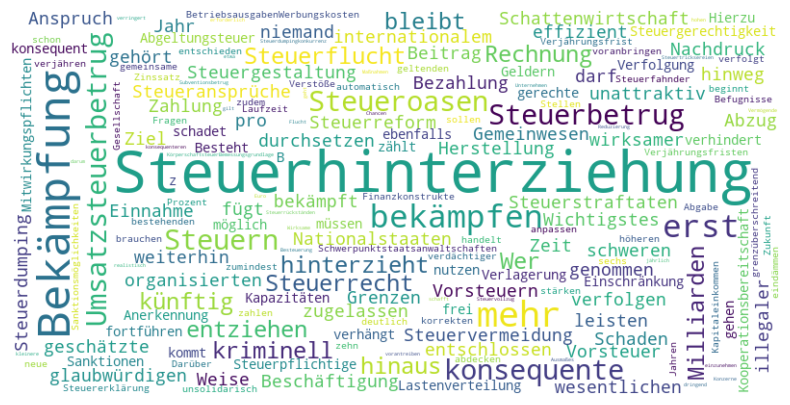

In [ ]:
generate_wordcloud(df_manifesto, 9, 605)

This plot calculates the total amount of statements for the target labels and predicted labels.

In [ ]:
# positions_labels = count_party_positions(df_manifesto, "label")
position_predictions = count_party_positions(df_manifesto, "predicted_label", party_colors)
positions = count_party_positions(df_manifesto, "label", party_colors)
positions["Austerity Predictions"] = position_predictions["Austerity Labels"]
positions["Expenditure Predictions"] = position_predictions["Expenditure Labels"]

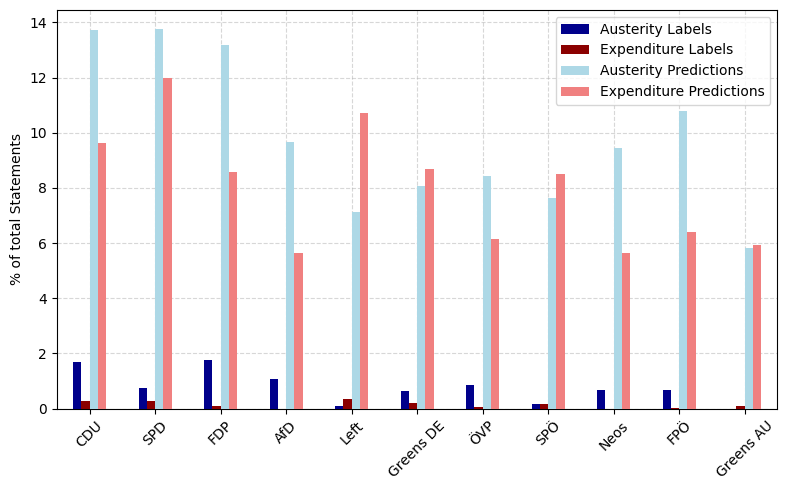

In [ ]:
positions.plot(kind='bar', figsize=(8, 5), color=['darkblue', 'darkred', 'lightblue', 'lightcoral'], zorder=3)

# Add labels and title
plt.ylabel('% of total Statements')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5, zorder=-1)

# Remove x-axis title
plt.xlabel(None)

# Show the plot
plt.tight_layout()
plt.show()


Next: generate a heatmap that filters cmp codes and one of the two labels related to fiscal policy.

In [ ]:
df_expansion = df_manifesto[df_manifesto['predicted_label'] == 1]
df_austerity = df_manifesto[df_manifesto['predicted_label'] == -1]
df_household = df_manifesto[df_manifesto['predicted_label'] != 0]

In [ ]:
code_list_exp = [
             108, 
             303, 
             401,
             402, 
             403,
             408, 
             409, 
            #  410, 
             411, 
             412, 
            #  413, 
            #  414, 
             416, 
             501,
             503, 
             504,
             701]

code_list_aus = [
            #  103,
                # 105,
               #  106,
               #  107,
                108,
                110,
                303,
               #  305,
                401,
                403,
                414,
                411,
                # 416,
                # 503,
                504,
                505,
                605,
                701]

all_codes= code_list_aus + code_list_exp
all_codes = list(set(all_codes))


heatmap_exp = plot_cmp_code_heatmap(df_expansion, code_list_exp, False)
heatmap_aus = plot_cmp_code_heatmap(df_austerity, code_list_aus, False)
heatmap_houshold = plot_cmp_code_heatmap(df_household, all_codes, False)

In [ ]:
heatmap_exp = restructure_years(heatmap_exp, cmp_categories)
heatmap_aus = restructure_years(heatmap_aus, cmp_categories)
heatmap_household = restructure_years(heatmap_houshold, cmp_categories)

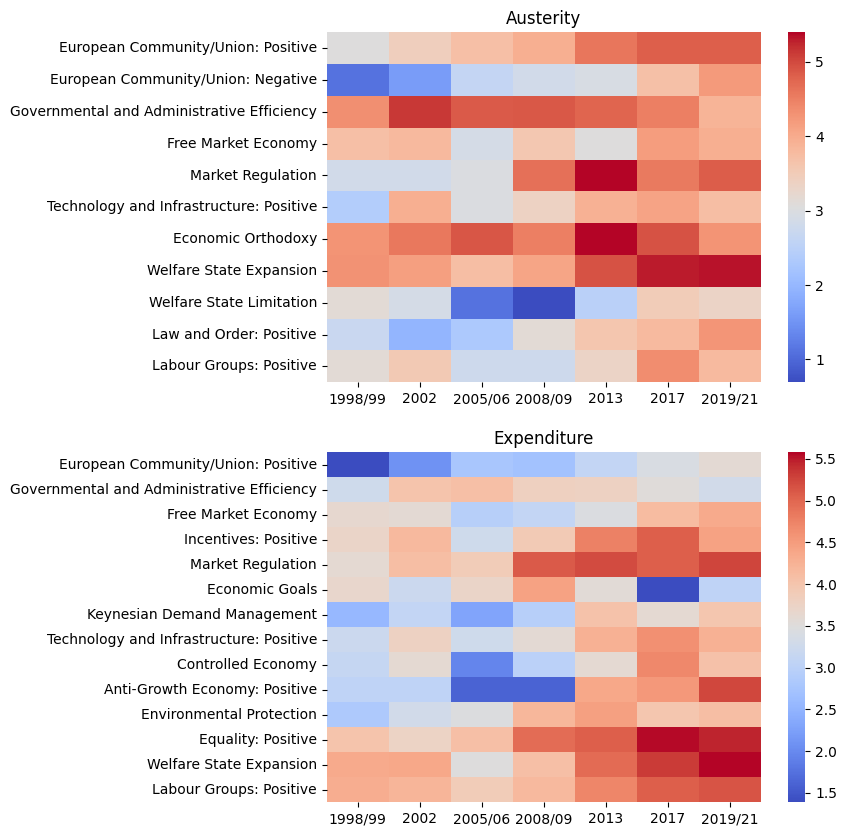

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 10))

# Plot the first heatmap on the first axis
sns.heatmap(heatmap_aus.iloc[:, :-3], cmap="coolwarm", xticklabels=True, yticklabels=heatmap_aus['title'], ax=axes[0])
axes[0].set_title('Austerity')

# Plot the second heatmap on the second axis
sns.heatmap(heatmap_exp.iloc[:, :-3], cmap="coolwarm", xticklabels=True, yticklabels=heatmap_exp['title'], ax=axes[1])
axes[1].set_title('Expenditure')


plt.show()

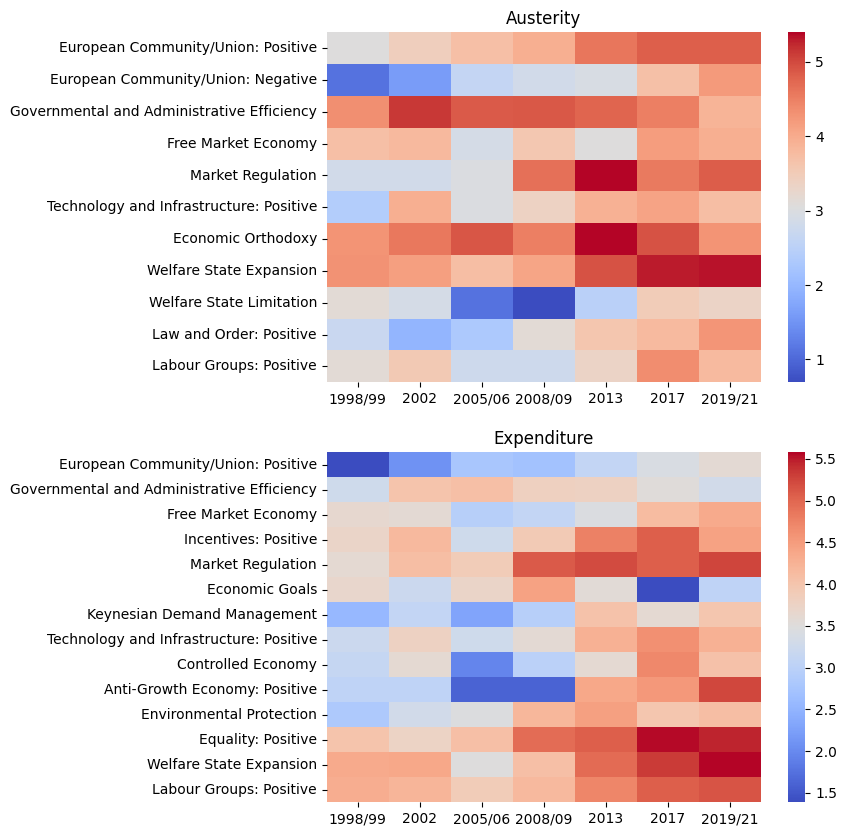

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 10))

# Plot the first heatmap on the first axis
sns.heatmap(heatmap_aus.iloc[:, :-3], cmap="coolwarm", xticklabels=True, yticklabels=heatmap_aus['title'], ax=axes[0])
axes[0].set_title('Austerity')

# Plot the second heatmap on the second axis
sns.heatmap(heatmap_exp.iloc[:, :-3], cmap="coolwarm", xticklabels=True, yticklabels=heatmap_exp['title'], ax=axes[1])
axes[1].set_title('Expenditure')


plt.show()